##Import & Load dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

In [3]:
ipl_df = pd.read_csv('deliveries.csv')

##Sneak peak into the data

In [4]:
ipl_df.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [5]:
ipl_df.batting_team.unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [6]:
ipl_df = ipl_df[(ipl_df.inning == 1) | (ipl_df.inning == 2)]

In [7]:
ipl_df.inning.unique()

array([1, 2], dtype=int64)

##Additional Columns

In [8]:
#1. total runs in each ball
#2. is there a wicket fall in that ball

In [9]:
ipl_df['total_runs']= ipl_df.apply(lambda x: x['batsman_runs'] + x['extra_runs'], axis = 1)

In [10]:
ipl_df.head(20)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
5,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,6,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
6,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,7,BB McCullum,P Kumar,SC Ganguly,0,1,1,legbyes,0,NaN,NaN,NaN
7,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,BB McCullum,Z Khan,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
8,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,Z Khan,SC Ganguly,4,0,4,NaN,0,NaN,NaN,NaN
9,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,Z Khan,SC Ganguly,4,0,4,NaN,0,NaN,NaN,NaN


In [11]:
type(ipl_df.player_dismissed[11])

float

In [12]:
ipl_df['isout']= ipl_df['player_dismissed'].apply(lambda x: 1 if type(x) == type('str') else 0)

## Choose Teams

In [13]:
# t1 - bat first, t2 - bat second
# Ex: MI vs CSK, (match_id: 1216521)

t1= 'Mumbai Indians'
t2= 'Chennai Super Kings'

##Choose a match between these teams

In [14]:
ipl_df[(ipl_df.batting_team == t1) & (ipl_df.bowling_team == t2) & (ipl_df.inning ==1)].match_id.unique()

array([ 392181,  392227,  501221,  598002,  598046,  598073,  729303,
        733995,  734045,  829729,  829817,  829823, 1136561, 1175370,
       1178419, 1181768, 1216492, 1304079, 1359486, 1359523], dtype=int64)

In [15]:
matchID = 11415

In [16]:
mdf = ipl_df[ipl_df.match_id == matchID]

In [17]:
mdf.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,isout


In [18]:
mdf.reset_index(inplace = True, drop = True)

In [19]:
mdf.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,isout


In [20]:
df1 = mdf[mdf.inning ==1]
df2 = mdf[mdf.inning ==2]

## Outcomes

In [21]:
# 0,1,2,3,4,5,6,7, 'W', 'extras'
outcomes = [0,1,2,3,4,6,'w']

In [22]:
ipl_df[ipl_df.batting_team == t1].total_runs.value_counts()

total_runs
1    12756
0    11171
4     3688
2     1939
6     1672
3      111
5       61
7       11
Name: count, dtype: int64

In [23]:
ipl_df[ipl_df.batting_team == t1].isout.sum()

1568

In [24]:
t1_outcomes_count = ipl_df[ipl_df.batting_team == t1].total_runs.value_counts()
t2_outcomes_count = ipl_df[ipl_df.batting_team == t2].total_runs.value_counts()

In [25]:
t1_outs = ipl_df[ipl_df.batting_team == t1].isout.sum()
t2_outs = ipl_df[ipl_df.batting_team == t2].isout.sum()

In [26]:
t1_outcomes = []
t2_outcomes = []


for outcome in outcomes:
    if outcome !='w':
        t1_outcomes.append(t1_outcomes_count[outcome])
        t2_outcomes.append(t2_outcomes_count[outcome])
    else:
        t1_outcomes.append(t1_outs)
        t2_outcomes.append(t2_outs)

In [27]:
t1_outcomes, t2_outcomes

([11171, 12756, 1939, 111, 3688, 1672, 1568],
 [9676, 12105, 1955, 111, 3240, 1499, 1243])

In [28]:
t1_pb_outcomes = [i/sum(t1_outcomes) for i in t1_outcomes]
t2_pb_outcomes = [i/sum(t2_outcomes) for i in t2_outcomes]

In [29]:
t1_pb_outcomes

[0.33949247834675583,
 0.38766144962771615,
 0.058927214709010786,
 0.0033733475155751404,
 0.112080230967938,
 0.05081294636073545,
 0.04765233247226865]

In [30]:
# (0 --> 1)
# ex:
# dot - 34%
# ones - 34% + 39% = 73%

In [31]:
t1_pb_ls = np.cumsum(t1_pb_outcomes)
t2_pb_ls = np.cumsum(t2_pb_outcomes)

In [32]:
t1_pb_ls, t2_pb_ls

(array([0.33949248, 0.72715393, 0.78608114, 0.78945449, 0.90153472,
        0.95234767, 1.        ]),
 array([0.32438231, 0.73019545, 0.79573569, 0.7994569 , 0.90807603,
        0.95832914, 1.        ]))

## Fetch probability values

In [33]:
# MI = [0.34147078, 0.73187941, 0.79130664, 0.79477795, 0.90540694,0.95332604, 1]
#CSK = [0.3306608 , 0.73266089, 0.79887064, 0.80275012, 0.91137549, 0.95896375, 1]

In [34]:
def get_pbvalues(teamName):
    if teamName == 'MI':
        p_0 = 0.34147078
        p_1 = 0.73187941
        p_2 = 0.79130664
        p_3 = 0.79477795
        p_4 = 0.90540694
        p_6 = 0.95332604
        p_w = 1

    elif teamName == 'CSK':
        p_0 = 0.3306608
        p_1 = 0.73266089
        p_2 = 0.79887064
        p_3 = 0.80275012
        p_4 = 0.91137549
        p_6 = 0.95896375
        p_w = 1

    return p_0,p_1,p_2,p_3,p_4,p_6,p_w

##Runs prediction Model

In [35]:
def predict_runs(target, curr_score, curr_wickets, curr_overs):

    #pb values of both teams
    i1p_0, i1p_1, i1p_2, i1p_3, i1p_4, i1p_6, i1p_w = get_pbvalues('MI')
    i2p_0, i2p_1, i2p_2, i2p_3, i2p_4, i2p_6, i2p_w = get_pbvalues('CSK')

    pred_runs = curr_score
    pred_wks = curr_wickets
    leftover_balls = 120- curr_overs*6

    for i in range(leftover_balls):
        r_value = np.random.random()

        if r_value <= i2p_0:
            pred_runs += 0
        elif r_value <= i2p_1:
            pred_runs += 1
        elif r_value <= i2p_2:
            pred_runs += 2
        elif r_value <= i2p_3:
            pred_runs += 3
        elif r_value <= i2p_4:
            pred_runs += 4
        elif r_value <= i2p_6:
            pred_runs += 6
        else:
            pred_runs += 0
            pred_wks += 1

            if pred_wks == 10:
                break
        if pred_runs > target:
            break

            #print('pred_runs:', pred_runs)
           #print('pred_wks:', pred_wks)

    return pred_runs

In [36]:
# predict_runs(target, curr_score, curr_wickets, curr_overs)
predict_runs(149, 0, 0, 0)

150

##Winner function

In [37]:
def get_win(pred_runs, target):
    if pred_runs > target:
        return 'win'
    elif pred_runs == target:
        return 'tie'
    else:
        return 'loss'

In [38]:
#runs, wickets, overs,
# win, 1st ing score

#MI = 149/8

target = 150

curr_score = 72
curr_wickets = 2
curr_overs = 10


iter_count = 100

runs_ls = []
results_ls = []
win_count = 0
tie_count = 0
loss_count = 0

for i in range(iter_count):
    pred_runs = predict_runs(target, curr_score, curr_wickets, curr_overs)
    runs_ls.append(pred_runs)
    result_pred = get_win(pred_runs, target)
    results_ls.append(result_pred)

    if result_pred == 'win':
        win_count += 1
    elif result_pred == 'tie':
        tie_count += 1
    else:
        loss_count +=1

In [39]:
win_count, tie_count, loss_count

(41, 3, 56)

##Find out Runs at a required stage

In [40]:
# find out runs:
def find_runs(curr_score, target, curr_wickets, at_overs):
    runs_ls = []
    results_ls = []

    req_runs = []
    win_ls = []

    for i in range(curr_score, target + 1):
        win_count = 0
        tie_count = 0
        loss_count = 0

        for j in range(100):
            pred_runs = predict_runs(target, i, curr_wickets, at_overs)
            runs_ls.append(pred_runs)
            result_pred = get_win(pred_runs, target)
            results_ls.append(result_pred)

            if result_pred == 'win':
                win_count += 1
            elif result_pred == 'tie':
                tie_count += 1
            else:
                loss_count +=1

            win_ls.append(win_count)
            req_runs.append(i)
            #print('runs', i, 'win%:', win_count)

    required_runs = curr_score
    for i in range(len(req_runs)):
        if win_ls[i] >= 50:
            required_runs = req_runs[i]
            #print('Runs to be:', req_runs[i])
            break

    return required_runs

In [41]:
#find_runs(curr_score, target, curr_wickets, at_overs)
find_runs(72, 150, 2, 10 )

73

##Find out Wickets they can afford to lose

In [42]:
def find_wickets(curr_score, target, curr_wickets, at_overs):

#find_runs(curr_score, target, curr_wickets, at_overs)
    req_runs = find_runs(curr_score, target, curr_wickets, at_overs)

    runs_ls = []
    results_ls = []

    req_wks = []
    win_ls = []

    for i in range(curr_wickets, 10):
        win_count = 0
        tie_count = 0
        loss_count = 0

        for j in range(100):
#        pred_runs = predict_runs(target, i, curr_wickets, at_overs)
            pred_runs = predict_runs(target, curr_score, i, at_overs)
            runs_ls.append(pred_runs)
            result_pred = get_win(pred_runs, target)
            results_ls.append(result_pred)

            if result_pred == 'win':
                win_count += 1
            elif result_pred == 'tie':
                tie_count += 1
            else:
                loss_count +=1

        win_ls.append(win_count)
        req_wks.append(i)
        print('wickets', i, 'win%:', win_count)

    req_wicket_value = curr_wickets

    for i in range(len(req_wks)):
        if (win_ls[i] < 45) :
            req_wicket_value = req_wks[i]
            break

    return req_wicket_value

In [43]:
#wickets they can afford to lose:
# find_wickets(curr_score, target, curr_wickets, at_overs)
find_wickets(72, 150, 2, 10)

wickets 2 win%: 32
wickets 3 win%: 43
wickets 4 win%: 35
wickets 5 win%: 34
wickets 6 win%: 39
wickets 7 win%: 34
wickets 8 win%: 20
wickets 9 win%: 9


2

##Function: Interactive chart

In [44]:
%matplotlib inline
from ipywidgets import interactive
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

def find_runs_wickets(curr_wks, at_overs, target_score):
    plt.figure(figsize = (16, 4))
    # x = np.linspace(-10, 10, num=1000)
    x = np.array(list(range(21)))
    req_value = find_runs(72, target_score, curr_wks, at_overs)
    req_wk_value = find_wickets(72, target_score, curr_wks, at_overs)

    if at_overs == 10:
        req_value = 72
        req_wk_value = 2


    # print(req_value)
    y = np.array([req_value for i in range(21)])

    # plt.plot(x, current_overs * x + target_score)
    # plt.plot(x, y)
    plt.scatter(at_overs, req_value, s = 1200, color = 'red')
    plt.axhline(target_score, ls = '--', color = 'blue')
    plt.text( 1, target_score + 10, 'Target Score :' + str(target_score) , color = 'darkblue', fontsize = 13)
    plt.text( at_overs, req_value, str(req_value) + '/' + str(req_wk_value), color = 'white', fontsize = 12,  horizontalalignment='center', verticalalignment='center')
    plt.text(at_overs, req_value - 30, 'CSK has to be at ' + str(req_value) + '/' +  str(req_wk_value) + ' after ' + str(at_overs) + ' ov', horizontalalignment='center')
    plt.ylim(50, target_score + 50)
    plt.xticks(x)
    plt.title('Where should CSK be?', fontsize = 20)
    plt.xlabel('Overs')
    plt.ylabel('Score')
    plt.show()

# x=widgets.IntSlider(min=-10, max=30, step=1, value=10)

# find_wickets(curr_score, target, curr_wickets, at_overs)
# find_wickets(87, 150, 1, 14)

##Interactive Visualization

wickets 2 win%: 46
wickets 3 win%: 41
wickets 4 win%: 46
wickets 5 win%: 38
wickets 6 win%: 39
wickets 7 win%: 28
wickets 8 win%: 26
wickets 9 win%: 9


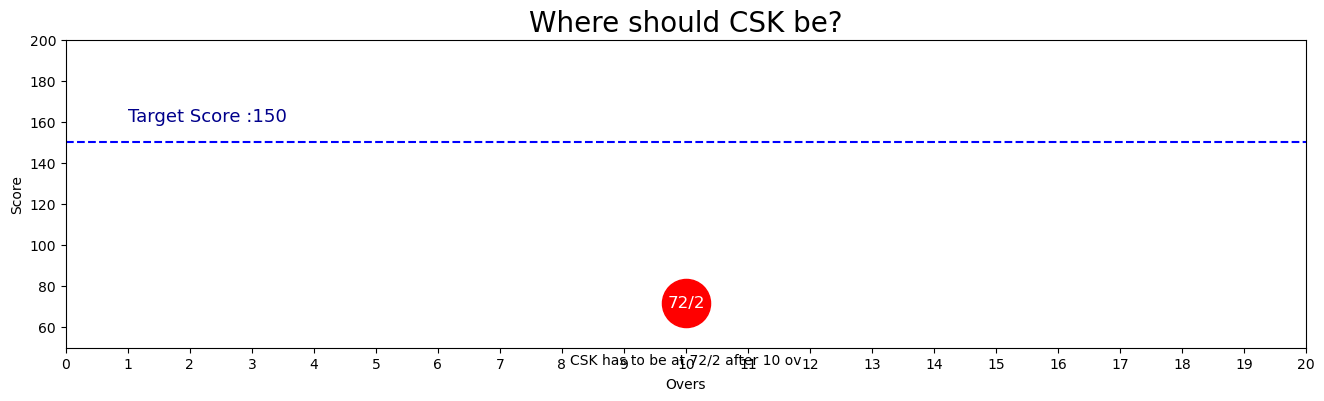

interactive(children=(IntSlider(value=2, description='curr_wks', max=10, min=2), IntSlider(value=10, descripti…

In [45]:
print('current_score = CSK: 72/2 (10.0 overs)')
print('')

interactive_plot = interactive(find_runs_wickets, curr_wks = widgets.IntSlider(min=2, max = 10, step=1, value=1), at_overs=widgets.IntSlider(min=10, max=20, step=1, value=10), target_score= widgets.IntSlider(min=0, max=250, step=1, value=150))
output = interactive_plot.children[-1]
output.layout.height = '450px'
interactive_plot